In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
np.random.seed(42)
n = 1000
ages = np.random.randint(20, 60, size=n)          # Age between 20 and 60
incomes = np.random.randint(30000, 120000, size=n) # Income between 30k and 120k


In [ ]:
labels = ((ages > 30) & (incomes > 60000)).astype(int)

In [ ]:
df = pd.DataFrame({'age': ages, 'income': incomes, 'label': labels})
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (1000, 3)
   age  income  label
0   58   74327      1
1   48   98904      1
2   34   33797      0
3   27   77882      0
4   40   43718      0


In [ ]:
# Features & Target
X = df[['age', 'income']]
y = df['label']


In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=5)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[113   0]
 [  0  87]]


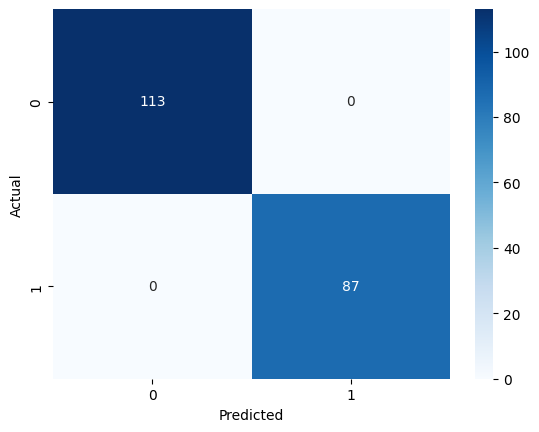

In [ ]:
# Confusion Matrix Heatmap
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.show()


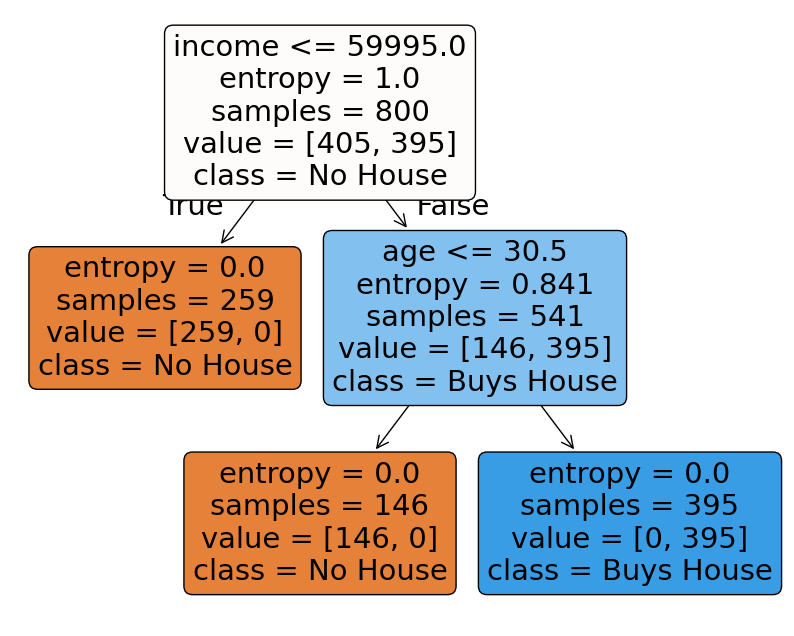

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=['age', 'income'], class_names=['No House', 'Buys House'], filled=True, rounded=True)
plt.show()


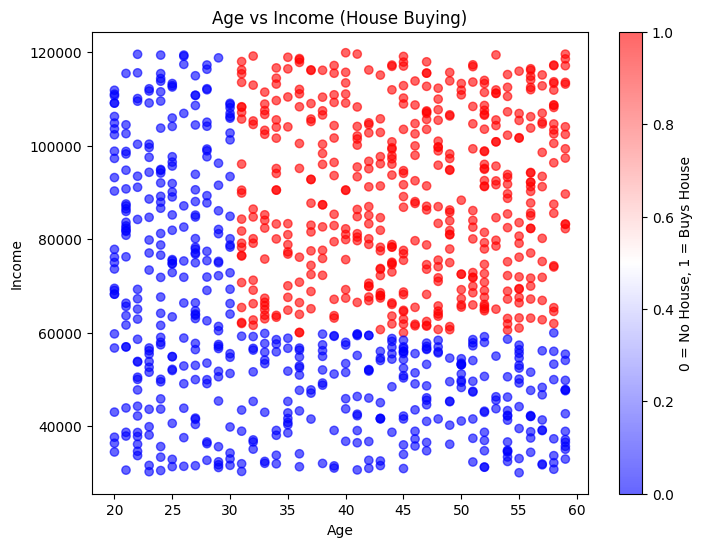

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['income'], c=df['label'], cmap='bwr', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income (House Buying)")
plt.colorbar(label="0 = No House, 1 = Buys House")
plt.show()